In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import scanpy as sc
import squidpy as sq
import anndata as ad
import seaborn as sns
import simstpy as sim
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
sim.__version__

'0.0.3'

<IPython.core.display.Javascript object>

In [4]:
SPATIAL_PATTERNS = [
    "human_DLPFC_151508",
    "human_DLPFC_151674",
    "mouse_cerebellum",
    "mouse_coronal_slices",
    "breast_tumor"
]

<IPython.core.display.Javascript object>

In [5]:
adata = sc.read_h5ad(f"./reference/151507.h5ad")
adata

AnnData object with n_obs × n_vars = 4221 × 15818
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'spatialLIBD', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

<IPython.core.display.Javascript object>

In [6]:
library_size_params = sim.rna.fit_library_size(adata.layers["counts"])
gene_mean_params = sim.rna.fit_gene_expression(adata.X, quantile=0.99)

<IPython.core.display.Javascript object>

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/zl_svg/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/zl_svg/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/zl_svg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


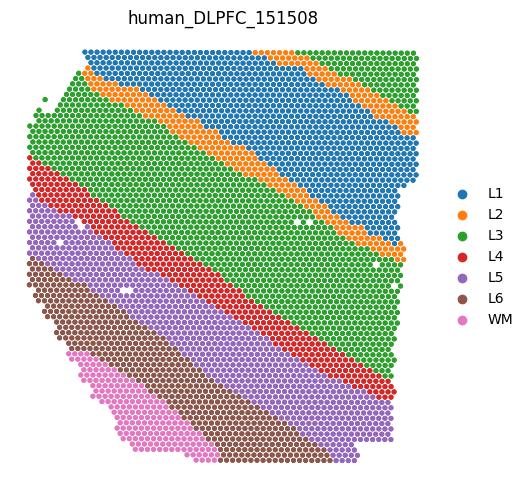

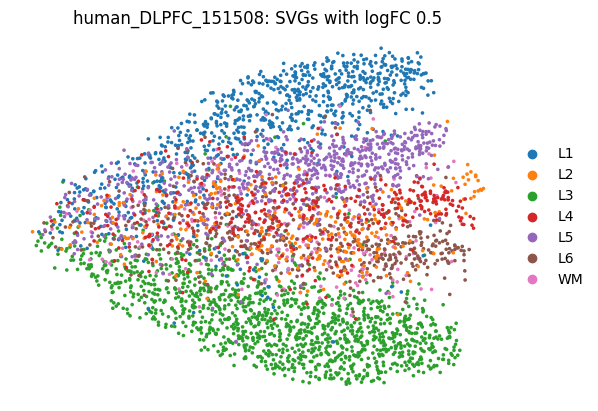

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/zl_svg/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/zl_svg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


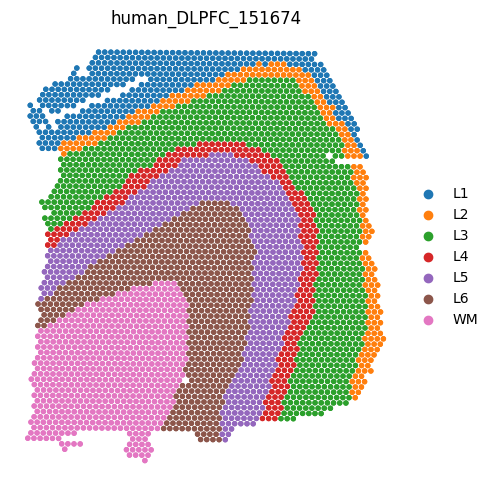

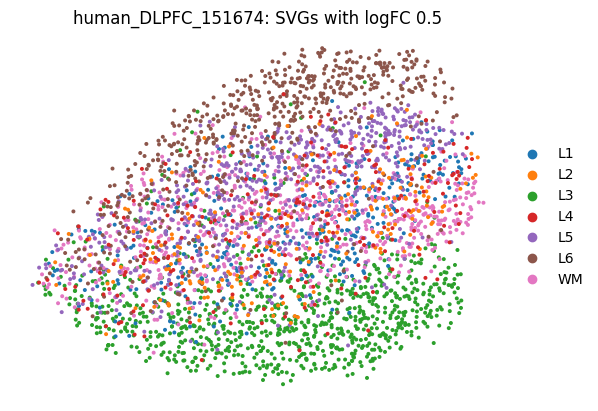

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/zl_svg/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/zl_svg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


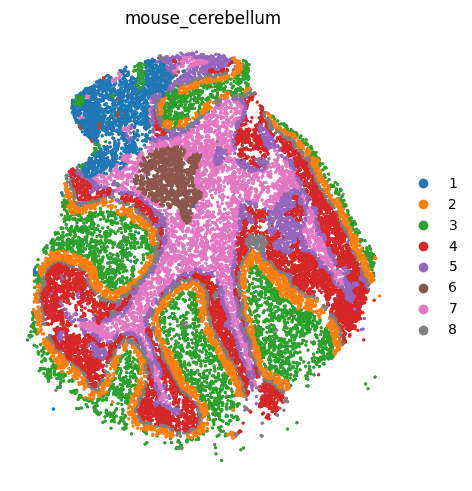

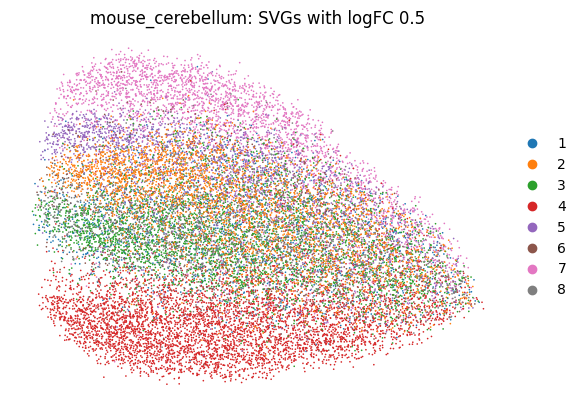

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/zl_svg/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/zl_svg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


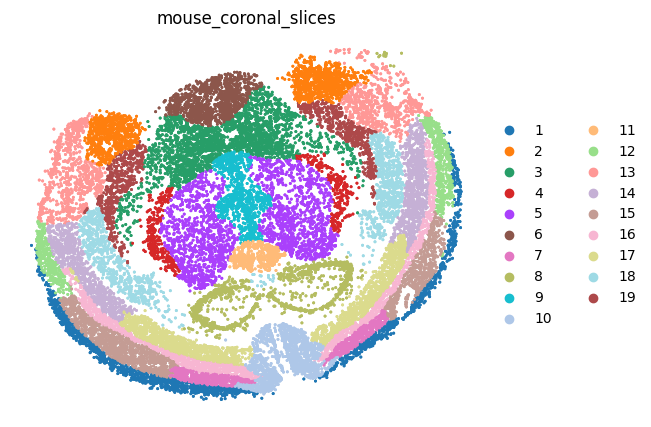

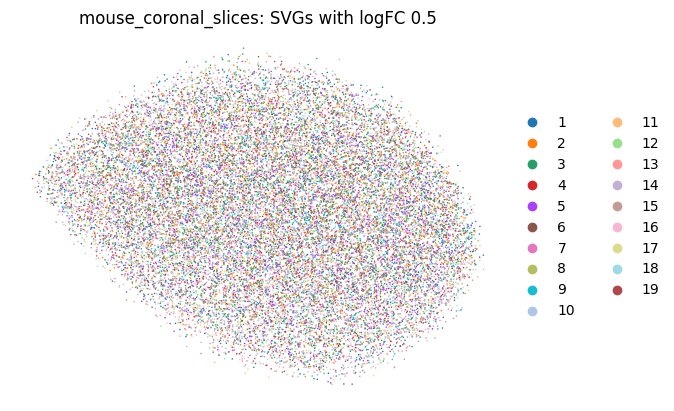

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/zl_svg/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/zl_svg/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/zl_svg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


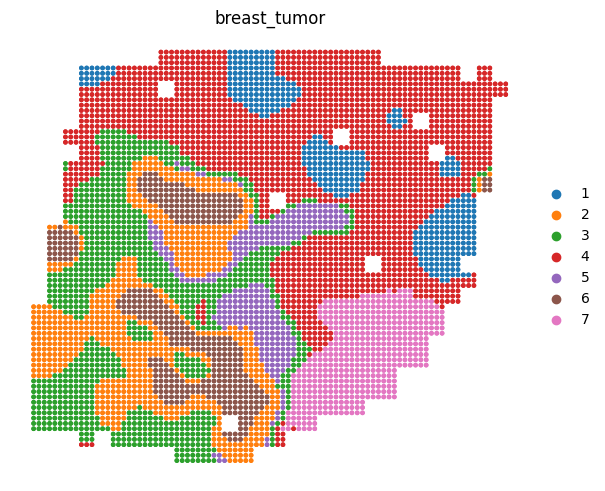

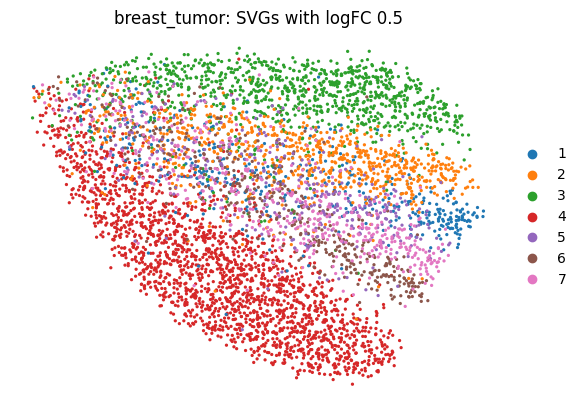

<IPython.core.display.Javascript object>

In [7]:
#for log_fc in [0.5, 1, 1.5, 2]:
for log_fc in [0.5]:
    for i, spatial_pattern in enumerate(SPATIAL_PATTERNS):
        df_spatial = sim.spatial.read_pattern(f"{spatial_pattern}")
    
        sim_adata = sim.rna.sim_multi_group(library_size_params,
                                            gene_mean_params,  
                                            n_svgs=100,
                                            n_non_svgs=100,
                                            df_spatial=df_spatial, 
                                            library_id=spatial_pattern,
                                            group_name="spatial_cluster",
                                            fold_change="fixed",
                                            log_fc=log_fc)
        
        sim_adata.layers['counts'] = sim_adata.X.copy()
        sc.pp.normalize_total(sim_adata, target_sum=1e4)
        sc.pp.log1p(sim_adata)

        sq.pl.spatial_scatter(sim_adata, shape=None, color=["spatial_cluster"], title=spatial_pattern, frameon=False)

        #sim.rna.compare_library_size(adata.layers['counts'], sim_adata.layers['counts'])

        adata2 = sim_adata[:, sim_adata.var.spatially_variable]
        sc.tl.pca(adata2, svd_solver='arpack')
        sc.pp.neighbors(adata2)
        sc.tl.umap(adata2)
        sc.pl.umap(adata2, color=['spatial_cluster'], title=f"{spatial_pattern}: SVGs with logFC {log_fc}", frameon=False)

        # adata3 = sim_adata[:, ~sim_adata.var.spatially_variable]
        # sc.tl.pca(adata3, svd_solver='arpack')
        # sc.pp.neighbors(adata3, n_neighbors=10, n_pcs=40)
        # sc.tl.umap(adata3)
        # sc.pl.umap(adata3, color=['spatial_cluster'], title=f"{spatial_pattern}: non-SVGs", frameon=False)
        
        sim_adata.write_h5ad(f"./Clustering/{spatial_pattern}_logfc_{log_fc}.h5ad")